<a href="https://colab.research.google.com/github/soupman21/IS_4487_Tokyo/blob/main/Campbell_Brown_3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# Load Data

In [7]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [8]:
ss.describe()


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [9]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [10]:
ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [11]:
ss_clean = ss.dropna()

In [12]:
# Search for and filter outliers
ss_clean.loc[ss['product_price'] >200000]

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
36547,51189,2021-07-02,2021-07,Tabitha Gomez,Lake Katrina,NEW YORK,2.0,"Half-Finger Gloves, L",Clothing,235481.0
36548,51316,2021-07-09,2021-07,Bethany Deng,South Melissafort,HAWAII,3.0,"Half-Finger Gloves, L",Clothing,235481.0
36549,51390,2021-07-13,2021-07,Deanna Rodriguez,Cunninghamton,UTAH,2.0,"Half-Finger Gloves, L",Clothing,235481.0
36550,51428,2021-07-16,2021-07,Margaret He,Port Kevin,OREGON,2.0,"Half-Finger Gloves, L",Clothing,235481.0
36551,51578,2021-07-25,2021-07,Gilbert Pal,Fordfort,OREGON,1.0,"Half-Finger Gloves, L",Clothing,235481.0
...,...,...,...,...,...,...,...,...,...,...
37874,74013,2022-06-28,2022-06,Brandi Serrano,New Elizabeth,OREGON,2.0,"Half-Finger Gloves, S",Clothing,235481.0
37875,74012,2022-06-28,2022-06,Brandon Sharma,Blevinsland,CONNECTICUT,2.0,"Half-Finger Gloves, S",Clothing,235481.0
37876,73950,1922-06-28,1922-06,Kurt Deng,West Nicholaston,NORTH DAKOTA,2.0,"Half-Finger Gloves, S",Clothing,235481.0
37877,74044,2022-06-29,2022-06,Andre Gonzalez,Bennetttown,MONTANA,2.0,"Half-Finger Gloves, S",Clothing,235481.0


In [13]:
ss_clean = ss_clean.loc[ss_clean['product_price'] < 200000]
ss_clean = ss_clean.loc[ss_clean['quantity'] < 10000]


In [15]:
# create total_purchase
ss_clean['total_purchase'] = ss_clean['product_price'] * ss_clean['quantity']

Check that your cleaning worked

In [16]:
ss_clean.info()
ss_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54173 non-null  int64  
 1   order_date        54173 non-null  object 
 2   order_year_month  54173 non-null  object 
 3   customer_name     54173 non-null  object 
 4   city              54173 non-null  object 
 5   state_province    54173 non-null  object 
 6   quantity          54173 non-null  float64
 7   product_name      54173 non-null  object 
 8   product_line      54173 non-null  object 
 9   product_price     54173 non-null  float64
 10  total_purchase    54173 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB


,order_id,quantity,product_price,total_purchase
count,54173.000000,54173.000000,54173.000000,5.417300e+04
mean,61642.138224,1.553025,614.109579,7.973136e+02
std,7518.845903,9.284931,816.673965,1.412708e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55623.000000,1.000000,7.950000,1.497000e+01
50%,61855.000000,1.000000,475.600000,4.756000e+02
75%,68063.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,2000.000000,3578.270000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [38]:
# average price
ss_clean['order_year_month'] = pd.to_datetime(ss_clean['order_year_month'], format='%Y-%m', errors='coerce') # Handle errors by setting invalid dates to NaT
ss_clean = ss_clean.dropna(subset=['order_year_month']) # Drop rows with NaT in 'order_year_month'
ss_clean = ss_clean[(ss_clean['order_year_month'] > '2018-01') & (ss_clean['order_year_month'] < pd.Timestamp('today'))]
ss_clean.groupby(['order_year_month'])['product_price'].mean()

order_year_month
2020-02-01    3199.469359
2020-03-01    3242.035279
2020-04-01    3194.646275
2020-05-01    3192.571359
2020-06-01    3132.275911
2020-07-01    1959.974251
2020-08-01    1924.981087
2020-09-01    1764.130833
2020-10-01    1800.830762
2020-11-01    1666.368901
2020-12-01    1729.697795
2021-01-01    1774.621612
2021-02-01    1755.272269
2021-03-01    1760.495962
2021-04-01    1691.161107
2021-05-01    1640.100368
2021-06-01    1694.477581
2021-07-01     729.851550
2021-08-01     409.107649
2021-09-01     437.462140
2021-10-01     434.127245
2021-11-01     468.310875
2021-12-01     500.330821
2022-01-01     469.658801
2022-02-01     481.718170
2022-03-01     485.362163
2022-04-01     482.481023
2022-05-01     513.701953
2022-06-01     509.168107
Name: product_price, dtype: float64

In [36]:
# total revenue
ss_clean['order_year_month'] = pd.to_datetime(ss_clean['order_year_month'], format='%Y-%m', errors='coerce') # Handle errors by setting invalid dates to NaT
ss_clean = ss_clean.dropna(subset=['order_year_month']) # Drop rows with NaT in 'order_year_month'
ss_clean = ss_clean[(ss_clean['order_year_month'] > '2018-01') & (ss_clean['order_year_month'] < pd.Timestamp('today'))]
ss_clean.groupby(['order_year_month'])['total_purchase'].sum()

order_year_month
2020-02-01     499117.22
2020-03-01     706668.08
2020-04-01     651707.84
2020-05-01     657669.70
2020-06-01     635852.01
2020-07-01     484113.64
2020-08-01     531294.78
2020-09-01     338713.12
2020-10-01     401585.26
2020-11-01     303279.14
2020-12-01     556962.69
2021-01-01     429458.43
2021-02-01     456370.79
2021-03-01     466531.43
2021-04-01     488745.56
2021-05-01     534672.72
2021-06-01     525288.05
2021-07-01    1072057.49
2021-08-01    1782453.48
2021-09-01    1864925.94
2021-10-01    2012010.82
2021-11-01    2152333.56
2021-12-01    2890764.61
2022-01-01    2398289.17
2022-02-01    2355462.16
2022-03-01    4440127.06
2022-04-01    2685226.38
2022-05-01    3049943.70
2022-06-01    2959952.22
Name: total_purchase, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

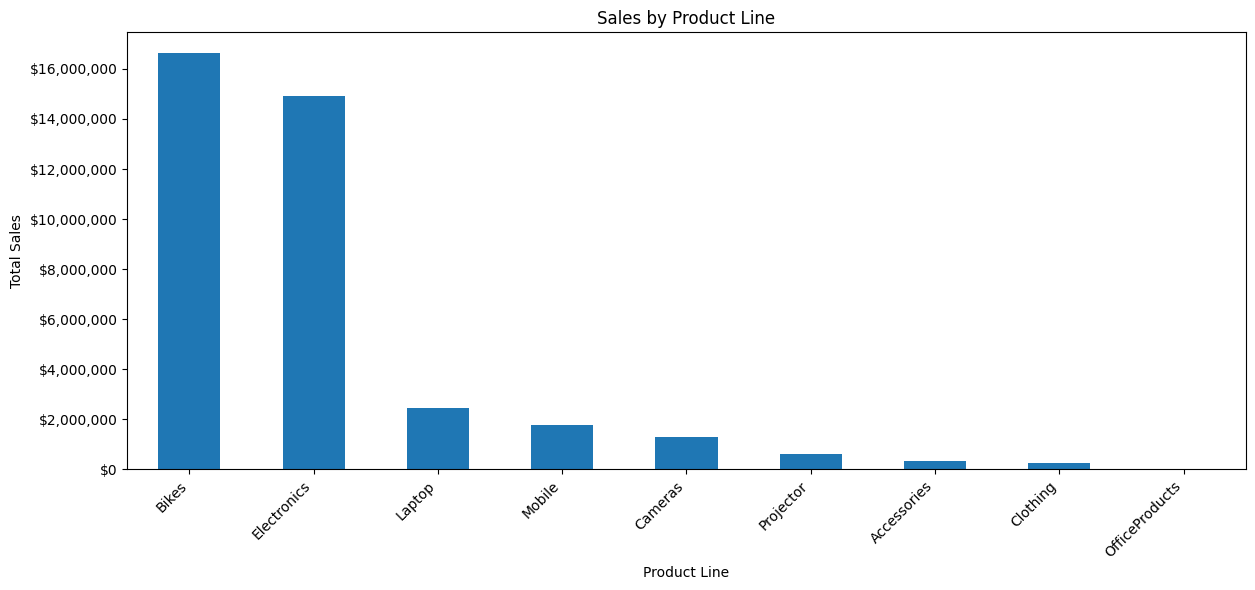

In [48]:
# Your code goes here.  Plot 1
sales_by_product_line = ss_clean.groupby('product_line')['total_purchase'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_product_line.plot(kind='bar')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

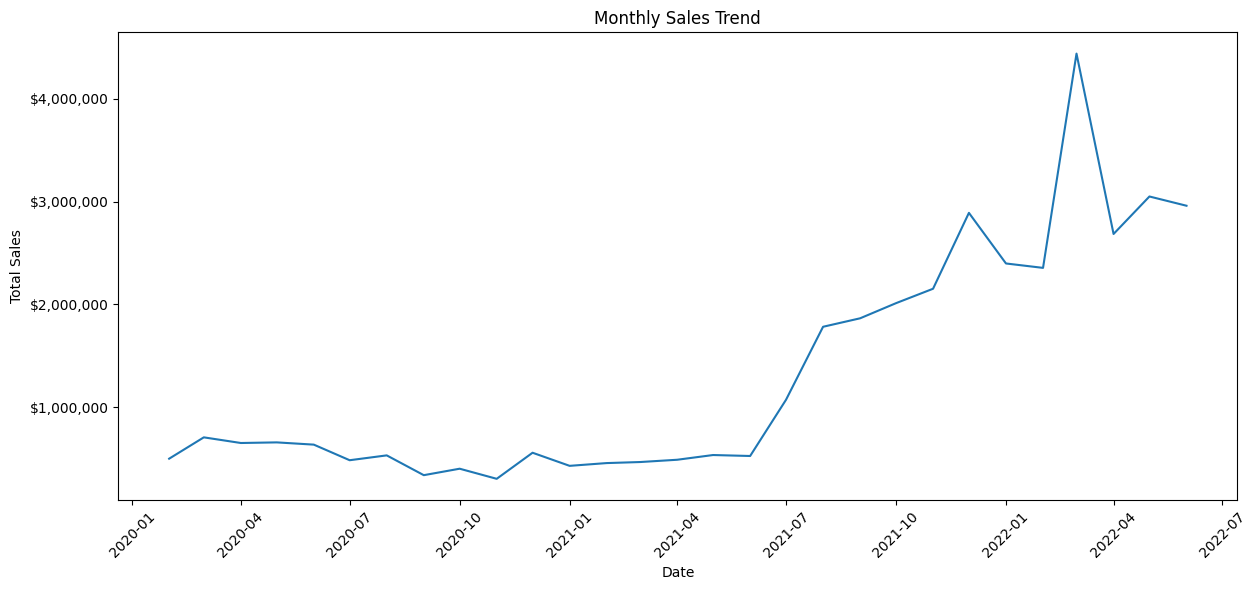

In [49]:
# Your code goes here.  Plot 2
ss_clean['order_date'] = pd.to_datetime(ss_clean['order_date'])
monthly_sales = ss_clean.groupby(ss_clean['order_date'].dt.to_period('M'))['total_purchase'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_date'], monthly_sales['total_purchase'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Make an interpretive comment.

Upon looking at the first graphs, the most successful product lines are Bikes and Electronics with clothing and office products being the least popular. When looking at the second graph, a pattern of the firms overall sales becomes visible. While they remained relatively stable with minor fluctuation from 2020-01 to 2021-06, they saw a rapid growth with small periods of losses from then to current. From the beginning of their recorded data to current, the firm has seen a growth of 593% with their most successful month being March of 2022, bringing in $4,440,127.06 in total sales.